<a href="https://colab.research.google.com/github/space-owner/Deep-Learning/blob/main/Single%20Task%20Learning%20with%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
%load_ext tensorboard

import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import shutil

try:
    shutil.rmtree("logs")
except:
    pass

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = tf.expand_dims(x_train, 3)
x_test = tf.expand_dims(x_test, 3)
print(x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, Flatten, Add, Dense

input_ = Input(shape=(28, 28, 1), name='input')

conv_1 = Conv2D(32 ,3, name='conv_1')(input_)
act_1 = Activation('relu', name='act_1')(conv_1)

# pool_1 = MaxPool2D(4, name='pool_1')(act_1)
# flat_1 = Flatten(name='flat_1')(pool_1)

# color = Dense(1, activation='sigmoid', name='color')(flat_1)

conv_2 = Conv2D(32, 3, padding='same', name='conv_2')(act_1)
act_2 = Activation('relu', name='act_2')(conv_2)

conv_3 = Conv2D(32, 3, padding='same', name='conv_3')(act_2)
add = Add(name='add')([act_1, conv_3])
act_3 = Activation('relu', name='act_3')(add)

pool_2 = MaxPool2D(4, name='pool_2')(act_3)
flat_2 = Flatten(name='flat_2')(pool_2)

digit = Dense(10, activation='softmax', name='digit')(flat_2)

model = tf.keras.models.Model(input_,
                              [digit,
                            #    color
                               ])

model.compile(
    loss={
        'digit': 'sparse_categorical_crossentropy',
        # 'color': 'binary_crossentropy'
    },
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 26, 26, 32)   320         input[0][0]                      
__________________________________________________________________________________________________
act_1 (Activation)              (None, 26, 26, 32)   0           conv_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 26, 26, 32)   9248        act_1[0][0]                      
____________________________________________________________________________________________

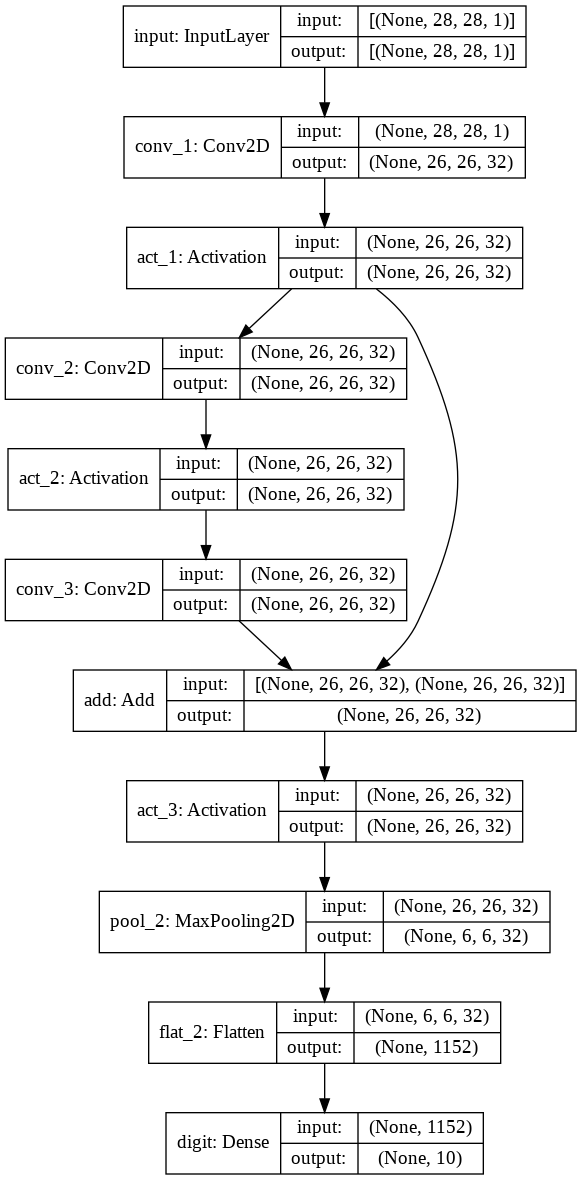

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
class Logger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        digit_accuracy = logs.get('digit_accuracy')
        # color_accuracy = logs.get('color_accuracy')

        val_digit_accuracy = logs.get('val_digit_accuracy')
        # val_color_accuracy = logs.get('val_color_accuracy')
        
        print('='*30, epoch +1, '='*30)
        # print(f'digit_accuracy: {digit_accuracy: 2f}, color_accuracy: {color_accuracy: 2f}')
        print(f'digit_accuracy: {digit_accuracy: 2f}')
        # print(f'val_digit_accuracy: {val_digit_accuracy: 2f}, val_color_accuracy: {val_color_accuracy: 2f}')
        print(f'val_digit_accuracy: {val_digit_accuracy: 2f}')

In [ ]:
# train_gen = generate_data(x_train, y_train)
# test_gen = generate_data(x_test, y_test)

_ = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    steps_per_epoch=200,
    validation_steps=100,
    batch_size=32,
    epochs=10,
    # callbacks=[
    #     Logger(), tf.keras.callbacks.TensorBoard(log_dir='./logs')
    # ],
    # verbose=False
)

Epoch 1/10
200/200 [==============================] - 22s 108ms/step - loss: 4.1218 - accuracy: 0.7548 - val_loss: 0.8734 - val_accuracy: 0.8356
Epoch 2/10
200/200 [==============================] - 21s 106ms/step - loss: 0.5563 - accuracy: 0.8928 - val_loss: 0.4211 - val_accuracy: 0.9062
Epoch 3/10
200/200 [==============================] - 21s 106ms/step - loss: 0.2926 - accuracy: 0.9281 - val_loss: 0.3171 - val_accuracy: 0.9234
Epoch 4/10
200/200 [==============================] - 21s 107ms/step - loss: 0.2446 - accuracy: 0.9431 - val_loss: 0.2082 - val_accuracy: 0.9422
Epoch 5/10
200/200 [==============================] - 22s 108ms/step - loss: 0.1765 - accuracy: 0.9534 - val_loss: 0.1953 - val_accuracy: 0.9481
Epoch 6/10
200/200 [==============================] - 21s 107ms/step - loss: 0.1587 - accuracy: 0.9581 - val_loss: 0.1791 - val_accuracy: 0.9519
Epoch 7/10
200/200 [==============================] - 21s 107ms/step - loss: 0.1467 - accuracy: 0.9609 - val_loss: 0.1555 - val_ac

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, Flatten, Add, Dense

input_ = Input(shape=(28, 28, 1), name='input')

conv_1 = Conv2D(32 ,3, name='conv_1')(input_)
act_1 = Activation('relu', name='act_1')(conv_1)

# pool_1 = MaxPool2D(4, name='pool_1')(act_1)
# flat_1 = Flatten(name='flat_1')(pool_1)

# color = Dense(1, activation='sigmoid', name='color')(flat_1)

conv_2 = Conv2D(32, 3, padding='same', name='conv_2')(act_1)
act_2 = Activation('relu', name='act_2')(conv_2)

conv_3 = Conv2D(32, 3, padding='same', name='conv_3')(act_2)
# add = Add(name='add')([act_1, conv_3])
# act_3 = Activation('relu', name='act_3')(add)
act_3 = Activation('relu', name='act_3')(conv_3)

pool_2 = MaxPool2D(4, name='pool_2')(act_3)
flat_2 = Flatten(name='flat_2')(pool_2)

digit = Dense(10, activation='softmax', name='digit')(flat_2)

model = tf.keras.models.Model(input_,
                              [digit,
                            #    color
                               ])

model.compile(
    loss={
        'digit': 'sparse_categorical_crossentropy',
        # 'color': 'binary_crossentropy'
    },
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
act_1 (Activation)           (None, 26, 26, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 26, 26, 32)        9248      
_________________________________________________________________
act_2 (Activation)           (None, 26, 26, 32)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 26, 26, 32)        9248      
_________________________________________________________________
act_3 (Activation)           (None, 26, 26, 32)        0     

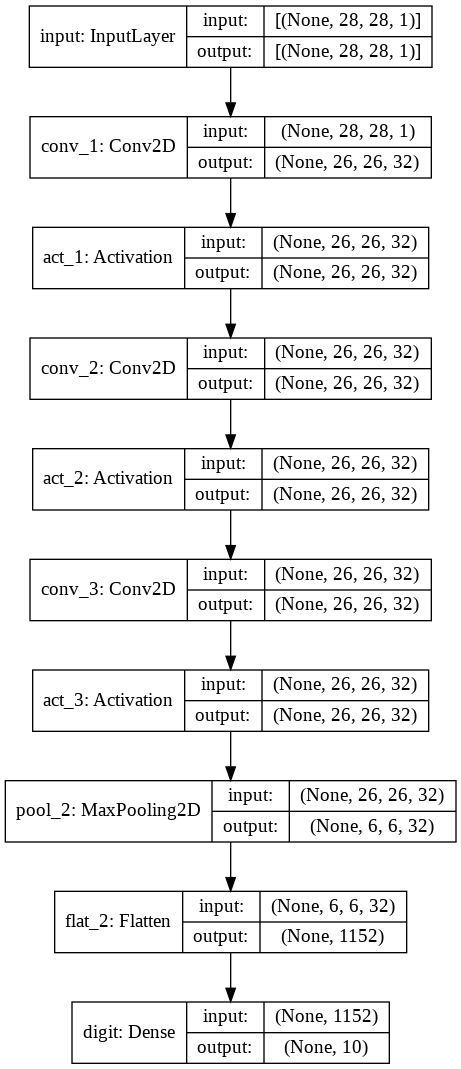

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# train_gen = generate_data(x_train, y_train)
# test_gen = generate_data(x_test, y_test)

_ = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    steps_per_epoch=200,
    validation_steps=100,
    batch_size=32,
    epochs=20,
    # callbacks=[
    #     Logger(), tf.keras.callbacks.TensorBoard(log_dir='./logs')
    # ],
    verbose=1
)

Epoch 1/20
200/200 [==============================] - 34s 14ms/step - loss: 1.0681 - accuracy: 0.8072 - val_loss: 0.3465 - val_accuracy: 0.8978
Epoch 2/20
200/200 [==============================] - 3s 13ms/step - loss: 0.2268 - accuracy: 0.9331 - val_loss: 0.1912 - val_accuracy: 0.9425
Epoch 3/20
200/200 [==============================] - 2s 11ms/step - loss: 0.1401 - accuracy: 0.9566 - val_loss: 0.1642 - val_accuracy: 0.9547
Epoch 4/20
200/200 [==============================] - 2s 11ms/step - loss: 0.1313 - accuracy: 0.9600 - val_loss: 0.2219 - val_accuracy: 0.9416
Epoch 5/20
200/200 [==============================] - 2s 12ms/step - loss: 0.1190 - accuracy: 0.9639 - val_loss: 0.1172 - val_accuracy: 0.9625
Epoch 6/20
200/200 [==============================] - 2s 11ms/step - loss: 0.0920 - accuracy: 0.9716 - val_loss: 0.0998 - val_accuracy: 0.9719
Epoch 7/20
200/200 [==============================] - 2s 10ms/step - loss: 0.0978 - accuracy: 0.9698 - val_loss: 0.1381 - val_accuracy: 0.957

In [ ]:
%tensorboard --logdir logs